In [1]:
import numpy as np
import pandas as pd 
import missingno as msno
from urllib.request import urlretrieve

In [2]:
path = 'https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv'
destination = 'italy-covid-daywise.csv'

urlretrieve(path, destination)

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7fe11811cd90>)

In [3]:
covid_df = pd.read_csv(destination)
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [4]:
covid_df.shape

(248, 4)

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

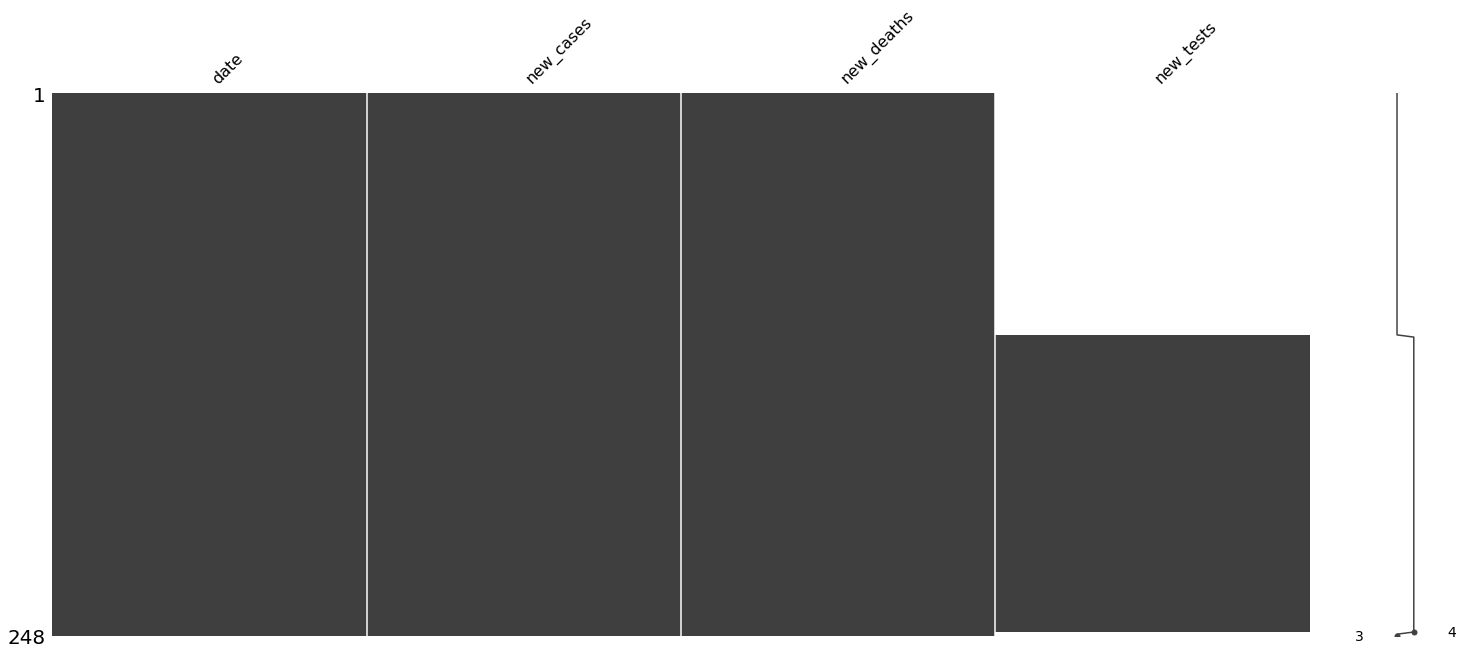

In [6]:
# we see that new_tests column contains a bunch of missing values (248-135=113)
# let's show them in a graph

msno.matrix(covid_df)

In [7]:
# display some statistics with describe() function
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [8]:
# display columns with columns attribute
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `msno.matrix()` - View missing values in a graph
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple


## Retrieving data from a data frame

The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns. 

In [9]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Representing data in the above format has a few benefits:

* All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.
* The representation is more compact (column names are recorded only once) compared to other formats that use a dictionary for each row of data (see the example below).

In [10]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

With the dictionary of lists analogy in mind, you can now guess how to retrieve data from a data frame. For example, we can get a list of values from a specific column using the `[]` indexing notation.

In [11]:
covid_data_dict['new_tests']

[53541, 42583, 54395, None, None]

In [12]:
covid_df['new_tests']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
243    53541.0
244    42583.0
245    54395.0
246        NaN
247        NaN
Name: new_tests, Length: 248, dtype: float64

## Analyzing data from data frames

Let's try to answer some questions about our data.

**Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the `sum` method to answer these questions.

In [13]:
# covid_df.head()
reported_cases = covid_df.new_cases.sum()
related_death = covid_df.new_deaths.sum()

print(f"reported new cases: {reported_cases}")
print(f"related death: {related_death}")

reported new cases: 271515.0
related death: 35497.0


**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [14]:
overall_death_rate = related_death / reported_cases
print(f"The overall death rate is: {overall_death_rate * 100 :.3f}%")

The overall death rate is: 13.074%


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**

In [15]:
conducted_test_before = 935310
conducted_test = conducted_test_before + covid_df.new_tests.sum()
print(f"The overall number of tests conducted is : {conducted_test}")

The overall number of tests conducted is : 5214766.0


**Q: What fraction of tests returned a positive result?**

In [16]:
positive_result = covid_df.loc[(covid_df['new_cases']>0)&(covid_df['new_deaths']!=None), 'new_cases']
print(f"The positif result : {positive_result.sum()}")
print(f"The positif rate: {positive_result.sum()/conducted_test*100: .3f}%")

The positif result : 271663.0
The positif rate:  5.209%


## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [17]:
# let's first change the type from date column from object to datetime
print("Before",covid_df.date.dtype)
covid_df.date = pd.to_datetime(covid_df.date)
print("After", covid_df.date.dtype)

Before object
After datetime64[ns]


In [18]:
days_more1000 = covid_df.loc[covid_df['new_cases']>1000, ['date']]
cnt = 0
for i in days_more1000.index:
    cnt +=1
cnt

72

We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall `positive_rate`.

In [19]:
positive_rate = positive_result.sum()/conducted_test
positive_rate

0.052094954979763235

In [20]:
covid_df.head()
high_ratio_df = covid_df.loc[covid_df['new_cases']/covid_df['new_tests'] > positive_rate, :]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [21]:
# calculate number of days that the ratio of cases reported to tests conducted 
# is higher than the overall positive_rate.
cnt = 0
for _i in high_ratio_df.index:
    cnt += 1
print(f"the number of days that the ratio is high: {cnt} days")

the number of days that the ratio is high: 12 days


In [22]:
# we can add positive_rate as a new column to covid_df
covid_df['positive_rate'] = (covid_df['new_cases']/covid_df['new_tests'] > positive_rate)
covid_df.sample(30)

,date,new_cases,new_deaths,new_tests,positive_rate
83,2020-03-23,5560.0,649.0,NaN,False
101,2020-04-10,4204.0,612.0,NaN,False
136,2020-05-15,992.0,262.0,39027.0,False
188,2020-07-06,192.0,7.0,13771.0,False
29,2020-01-29,0.0,0.0,NaN,False
13,2020-01-13,0.0,0.0,NaN,False
171,2020-06-19,331.0,66.0,28570.0,False
130,2020-05-09,1327.0,243.0,36091.0,False
237,2020-08-24,1209.0,7.0,33358.0,False
242,2020-08-29,1460.0,9.0,64294.0,False


However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this `positive_rate` column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the `positive_rate` column using the `drop` method.

In [23]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [24]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


### Sorting rows using column values

The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of cases, then chain it with the `head` method to list just the first ten results.

In [25]:
# top ten highest number of cases
covid_df.sort_values(by='new_cases', axis=0, ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [26]:
# top 10 death cases
covid_df.sort_values(by='new_deaths', axis=0, ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


It appears that daily deaths hit a peak just about a week after the peak in daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year on this list.

In [27]:
# top 10 lowest new cases
covid_df.sort_values(by=['new_cases'], ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


It seems like the count of new cases on Jun 20, 2020, was `-148`, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at some days before and after Jun 20, 2020.

In [28]:
covid_df[167:177]

,date,new_cases,new_deaths,new_tests
167,2020-06-15,338.0,44.0,17463.0
168,2020-06-16,301.0,26.0,27762.0
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0
176,2020-06-24,113.0,18.0,30237.0


For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Replace it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach.

You can use the `.at` method to modify a specific value within the dataframe.

In [29]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases']) / 2

In [30]:
covid_df[167:177]

,date,new_cases,new_deaths,new_tests
167,2020-06-15,338.0,44.0,17463.0
168,2020-06-16,301.0,26.0,27762.0
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0
176,2020-06-24,113.0,18.0,30237.0


Here's a summary of the functions & methods we looked at in this section:

- `covid_df.new_cases.sum()` - Computing the sum of values in a column or series
- `covid_df[covid_df.new_cases > 1000]` - Querying a subset of rows satisfying the chosen criteria using boolean expressions
- `df['pos_rate'] = df.new_cases/df.new_tests` - Adding new columns by combining data from existing columns
- `covid_df.drop('positive_rate')` - Removing one or more columns from the data frame
- `sort_values` - Sorting the rows of a data frame using column values
- `covid_df.at[172, 'new_cases'] = ...` - Replacing a value within the data frame

## Working with dates

While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.

date has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class ([view docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)).m

In [31]:
# let's create four columns to covid_df that contains
# year,month, day and weekday
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [32]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5


Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the `sum` method to aggregate each selected column's values.

In [33]:
# Query the rows of may
covid_df_may = covid_df.loc[covid_df['month']== 5, :]

# # Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()
# covid_may_totals

In [34]:
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [35]:
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [36]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [37]:
# we can get the same result in one single code line
covid_df.loc[covid_df['month'] == 5,['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the `.mean` method.

In [38]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [39]:
# Average for Sundays
covid_df.loc[covid_df['weekday'] == 6, 'new_cases'].mean()

1247.2571428571428

## Grouping and aggregation

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method. 

In [40]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


The result is a new data frame that uses unique values from the column passed to `groupby` as the index. Grouping and aggregation is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [41]:
covid_month_mean_df = covid_df.groupby(by='month')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [47]:
covid_weekday_df = covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_weekday_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.

In [42]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = conducted_test_before + covid_df.new_tests.cumsum()

In [43]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


Notice how the `NaN` values in the `total_tests` column remain unaffected.

## Merging data from multiple sources

To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Let's download another file `locations.csv` that contains health-related information for many countries, including Italy.

In [44]:
url = 'https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv'
destination = 'locations.csv'

urlretrieve(url, destination)

('locations.csv', <http.client.HTTPMessage at 0x7fe1090fa100>)

In [45]:
locations_df = pd.read_csv(destination)
locations_df.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


In [46]:
locations_df[locations_df['location'] == 'Morocco']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
131,Morocco,Africa,36910558.0,76.68,1.1,7485.013


In [48]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

In [49]:
covid_df['location'] = 'Italy'

We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [51]:
merged_df = covid_df.merge(locations_df, on='location')
merged_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [52]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [53]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [54]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [55]:
merged_df.sample(10)

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
43,2020-02-12,0.0,0.0,NaN,2020,2,12,2,3.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.049618,0.000000,NaN
98,2020-04-07,3599.0,636.0,NaN,2020,4,7,1,132547.0,16525.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,2192.242682,273.312941,NaN
47,2020-02-16,0.0,0.0,NaN,2020,2,16,6,3.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.049618,0.000000,NaN
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4,205463.0,27967.0,1398633.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,3398.226729,462.556309,23132.496093
121,2020-04-30,2086.0,323.0,41441.0,2020,4,30,3,203591.0,27682.0,1354901.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,3367.265045,457.842591,22409.196758
183,2020-07-01,142.0,23.0,29325.0,2020,7,1,2,241023.5,34767.0,3293300.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,3986.374676,575.023964,54469.077581
135,2020-05-14,888.0,195.0,41131.0,2020,5,14,3,222104.0,31106.0,1820083.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,3673.458236,514.473363,30103.009787
53,2020-02-22,14.0,0.0,NaN,2020,2,22,5,17.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.281169,0.000000,NaN
59,2020-02-28,250.0,5.0,NaN,2020,2,28,4,650.0,17.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,10.750585,0.281169,NaN
104,2020-04-13,4092.0,431.0,NaN,2020,4,13,0,156363.0,19901.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,2586.144104,329.149823,NaN


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

In [58]:
result_df = merged_df[[
    'date',
    'new_cases',
    'total_cases',
    'new_deaths',
    'total_deaths',
    'new_tests',
    'total_tests',
    'cases_per_million',
    'deaths_per_million',
    'tests_per_million'
    
]]

result_df.head()

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN


To write the data from the data frame into a file, we can use the `to_csv` function. 

In [59]:
result_df.to_csv('results.csv', index=None)

In [60]:
result_df.set_index('date', inplace=True)

In [61]:
result_df.head()

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN


Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific data using `.loc`.

In [62]:
result_df.loc['2020-09-01', 'cases_per_million': 'tests_per_million']

cases_per_million      4459.995818
deaths_per_million      586.866146
tests_per_million     86248.897403
Name: 2020-09-01 00:00:00, dtype: float64

In [63]:
result_df.loc['2020-09-01', :]

new_cases             9.960000e+02
total_cases           2.696595e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.459996e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

## Basic Plotting with Pandas

We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

Let's plot a line graph showing how the number of daily cases varies over time.

<AxesSubplot:xlabel='date'>

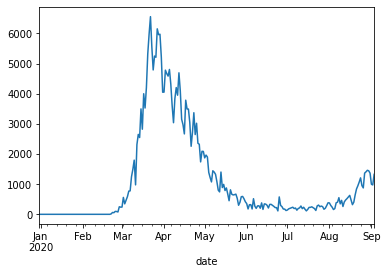

In [64]:
result_df.new_cases.plot()

Let's plot the new cases & new deaths per day as line graphs.

<AxesSubplot:xlabel='date'>

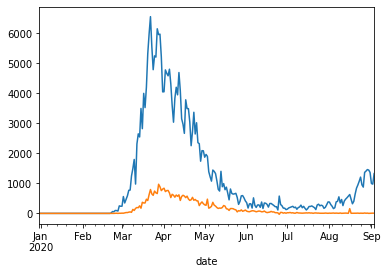

In [65]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

We can also compare the total cases vs. total deaths.

<AxesSubplot:xlabel='date'>

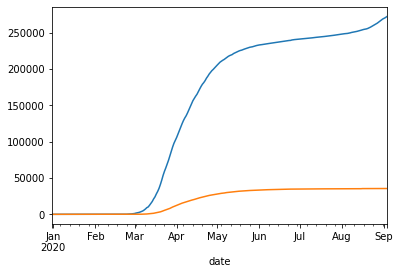

In [66]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

Let's see how the death rate and positive testing rates vary over time.

In [67]:
death_rate = result_df.total_deaths / result_df.total_cases

<AxesSubplot:title={'center':'Death rate'}, xlabel='date'>

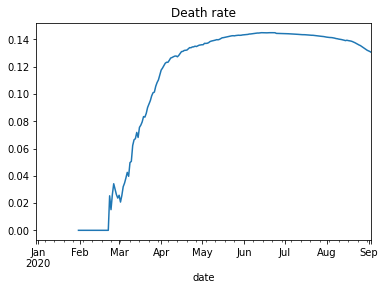

In [68]:
death_rate.plot(title='Death rate')

In [69]:
positive_rates = result_df.total_cases / result_df.total_tests

<AxesSubplot:title={'center':'Positive Rate'}, xlabel='date'>

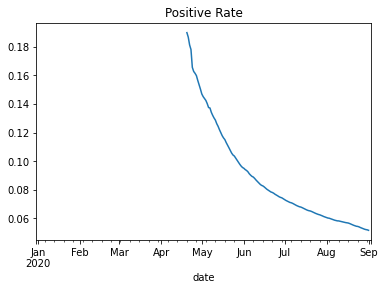

In [70]:
positive_rates.plot(title='Positive Rate')

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

<AxesSubplot:xlabel='month'>

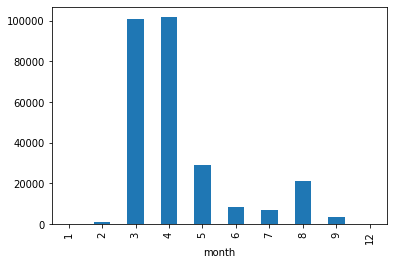

In [71]:
covid_month_df.new_cases.plot(kind='bar')

<AxesSubplot:xlabel='month'>

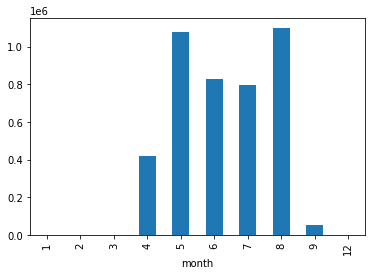

In [72]:
covid_month_df.new_tests.plot(kind='bar')